# Chemicals Segregation - Assignment

---

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook

In [2]:
dfX = pd.read_csv('../Datasets/Logistic_Regression/Training Data/Logistic_X_Train.csv')
dfY = pd.read_csv('../Datasets/Logistic_Regression/Training Data/Logistic_Y_Train.csv')

In [3]:
print(dfX.shape)
print(dfY.shape)

(3000, 3)
(3000, 1)


In [4]:
dfX.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [5]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3000 non-null   float64
 1   f2      3000 non-null   float64
 2   f3      3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [6]:
dfX.describe()

,f1,f2,f3
count,3000.000000,3000.000000,3000.000000
mean,0.007453,0.999286,0.029487
std,1.334138,1.023853,1.209558
min,-3.470773,-3.692615,-3.286481
25%,-1.045220,0.325665,-0.986959
50%,-0.144115,1.004693,0.225411
75%,1.052555,1.693354,1.041319
max,3.741376,4.185015,2.706148


In [7]:
dfY.head()

,label
0,1
1,1
2,1
3,0
4,0


In [8]:
X = dfX.values
y = dfY.values

In [9]:
print(X.shape)
print(y.shape)

print(type(X))
print(type(y))

(3000, 3)
(3000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
X

array([[-1.23937466,  0.74910149, -0.52851491],
       [-1.03607028,  0.80143631, -1.28371152],
       [-0.61557914,  1.57952053, -1.39192706],
       ...,
       [ 0.08827657,  1.63878904, -2.19364056],
       [ 1.52515501,  0.85923429,  1.50530791],
       [-0.97981744,  0.56395376, -1.53939416]])

In [11]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

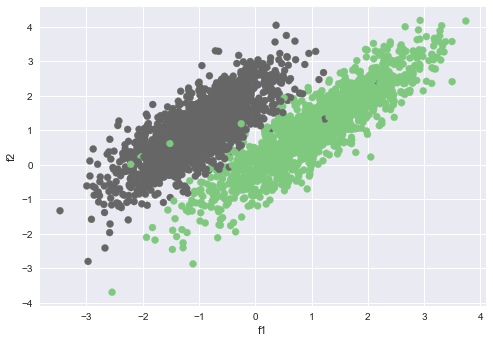

In [12]:
plt.style.use('seaborn')
plt.scatter(X[:, 0], X[:, 1], c=y.reshape((-1,)), cmap=plt.cm.Accent)
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

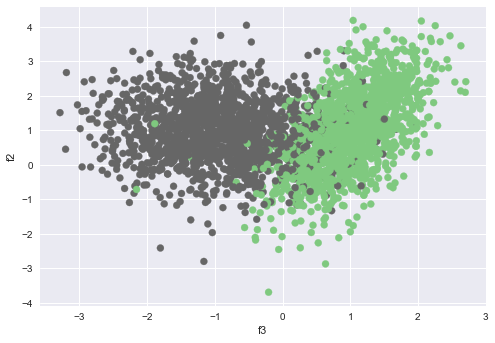

In [13]:
plt.style.use('seaborn')
plt.scatter(X[:, 2], X[:, 1], c=y.reshape((-1,)), cmap=plt.cm.Accent)
plt.xlabel('f3')
plt.ylabel('f2')
plt.show()

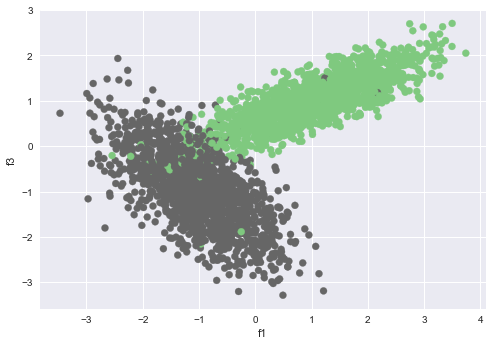

In [14]:
plt.style.use('seaborn')
plt.scatter(X[:, 0], X[:, 2], c=y.reshape((-1,)), cmap=plt.cm.Accent)
plt.xlabel('f1')
plt.ylabel('f3')
plt.show()

<IPython.core.display.Javascript object>


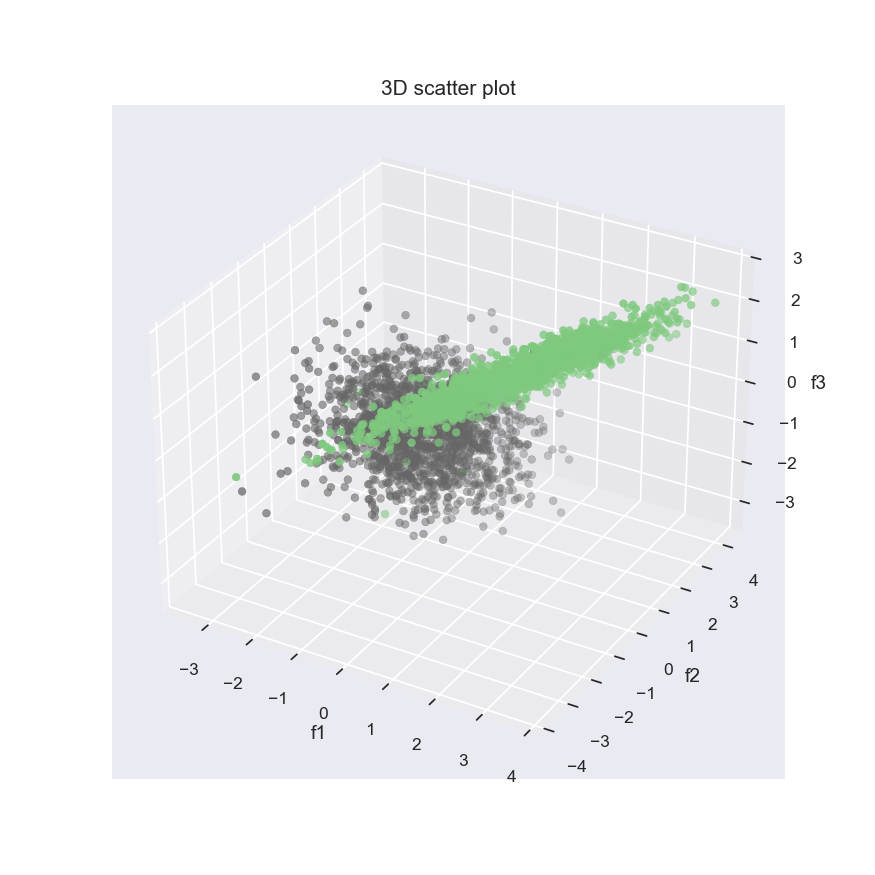

In [31]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection='3d')

# Creating Plot
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y.reshape((-1,)), cmap=plt.cm.Accent)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.title('3D scatter plot')
plt.show()

### Normalize and visualise

In [17]:
X.mean()

0.345408954154345

In [15]:
X.mean(axis=0)

array([0.00745338, 0.99928635, 0.02948714])

In [16]:
X.std(axis=0)

array([1.33391527, 1.02368243, 1.20935638])

In [18]:
X_ = (X - X.mean(axis=0)) / X.std(axis=0)

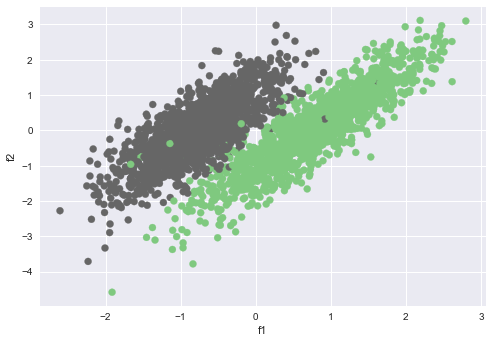

In [23]:
plt.style.use('seaborn')
plt.scatter(X_[:, 0], X_[:, 1], c=y.reshape((-1,)), cmap=plt.cm.Accent)
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

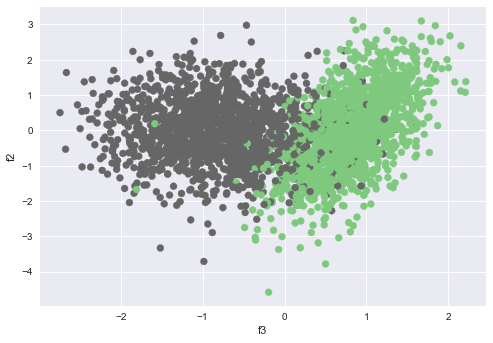

In [24]:
plt.style.use('seaborn')
plt.scatter(X_[:, 2], X_[:, 1], c=y.reshape((-1,)), cmap=plt.cm.Accent)
plt.xlabel('f3')
plt.ylabel('f2')
plt.show()

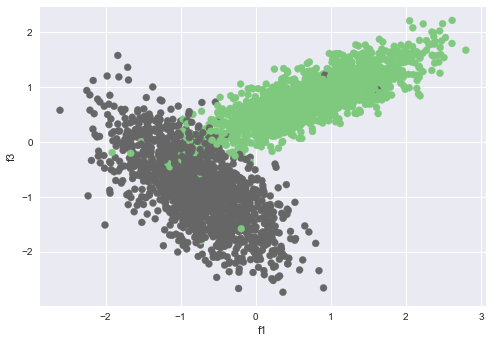

In [25]:
plt.style.use('seaborn')
plt.scatter(X_[:, 0], X_[:, 2], c=y.reshape((-1,)), cmap=plt.cm.Accent)
plt.xlabel('f1')
plt.ylabel('f3')
plt.show()

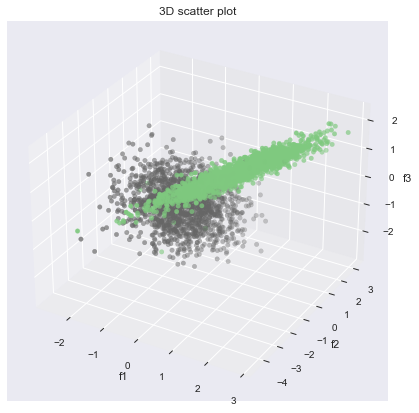

In [26]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection='3d')

# Creating Plot
ax.scatter3D(X_[:, 0], X_[:, 1], X_[:, 2], c=y.reshape((-1,)), cmap=plt.cm.Accent)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.title('3D scatter plot')
plt.show()

In [28]:
X_.shape, y.shape

((3000, 3), (3000, 1))

In [29]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def hypothesis(X, theta):
    '''
    params -
        X - (m, n + 1)
        theta - (n + 1, 1)
    returns
        hypothesis_vector - (m, 1)
    '''
    return sigmoid(np.dot(X, theta))

In [30]:
def error(X, y, theta):
    '''
    params -
        X - (m, n + 1)
        y - (m, 1)
        theta - (n + 1, 1)
    returns -
        error - scalar
    '''
    hy = hypothesis(X, theta)
    e = -1.0 * np.mean((y * np.log(hy)) + ((1 - y) * np.log(1 - hy)))
    return e

In [31]:
def gradient(X, y, theta):
    '''
    params -
        X - (m, n + 1)
        y - (m, 1)
        theta - (n + 1, 1)
    returns -
        gradient_vector - (n + 1, 1)
    '''
    m = X.shape[0]
    hy = hypothesis(X, theta)
    grad = np.dot(X.T, (hy - y))
    return grad / m

def gradient_descent(X, y, lr=0.1, max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n, 1))
    error_list = []
    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err)
        grad = gradient(X, y, theta)
        theta = theta - lr * grad
    return theta, error_list

In [32]:
X_train = np.hstack((np.ones((X_.shape[0], 1)), X_))
Y_train = y

print(X_train.shape)
print(Y_train.shape)

(3000, 4)
(3000, 1)


In [33]:
X_train[:3]

array([[ 1.        , -0.93471307, -0.24439694, -0.46140414],
       [ 1.        , -0.7823013 , -0.19327286, -1.08586573],
       [ 1.        , -0.46707053,  0.56681072, -1.17534766]])

In [34]:
theta, error_list = gradient_descent(X_train, Y_train)

In [35]:
theta

array([[-0.34767648],
       [-2.54073799],
       [ 1.38266256],
       [-2.30256859]])

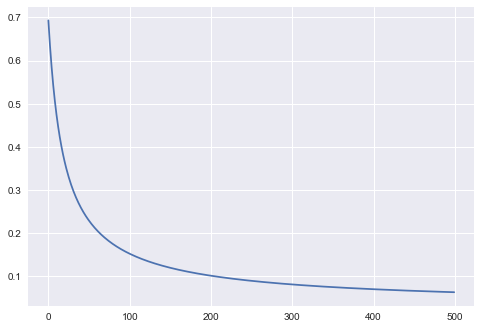

In [36]:
plt.plot(error_list)
plt.show()

In [37]:
theta, error_list = gradient_descent(X_train, Y_train, 0.5, 1000)
print(theta)
print(error_list[-1])

[[-1.07616924]
 [-4.76226471]
 [ 2.9484687 ]
 [-2.92705507]]
0.034236984598287154


In [38]:
theta, error_list = gradient_descent(X_train, Y_train, 0.5, 2000)
print(theta)
print(error_list[-1])

[[-1.27982743]
 [-5.37720247]
 [ 3.34767284]
 [-2.91782325]]
0.032994275670509145


In [39]:
theta, error_list = gradient_descent(X_train, Y_train, 0.7, 3000)
print(theta)
print(error_list[-1])

[[-1.40798934]
 [-5.82457416]
 [ 3.63563228]
 [-2.89113187]]
0.032676290865333184


<IPython.core.display.Javascript object>


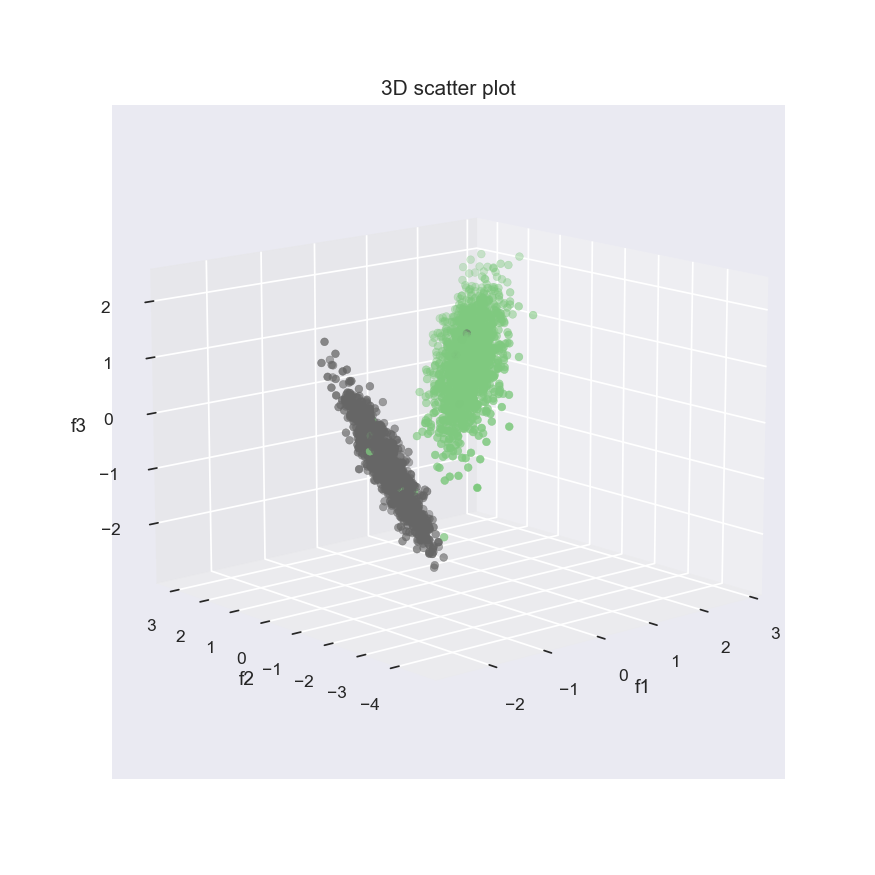

In [47]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection='3d')

# Creating Plot
ax.scatter3D(X_[:, 0], X_[:, 1], X_[:, 2], c=y.reshape((-1,)), cmap=plt.cm.Accent)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.title('3D scatter plot')
plt.show()

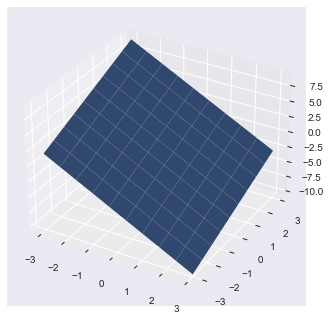

In [42]:
point_x = np.linspace(-3, 3, 10)
point_y = np.linspace(-3, 3, 10)

point_X, point_Y = np.meshgrid(point_x, point_y)
point_Z = (-1.0 * (theta[0] + theta[1] * point_X + theta[2] * point_Y)) / theta[3]
fig = plt.figure()
axx = fig.gca(projection='3d')
surf = axx.plot_surface(point_X, point_Y, point_Z)
plt.show()

<IPython.core.display.Javascript object>


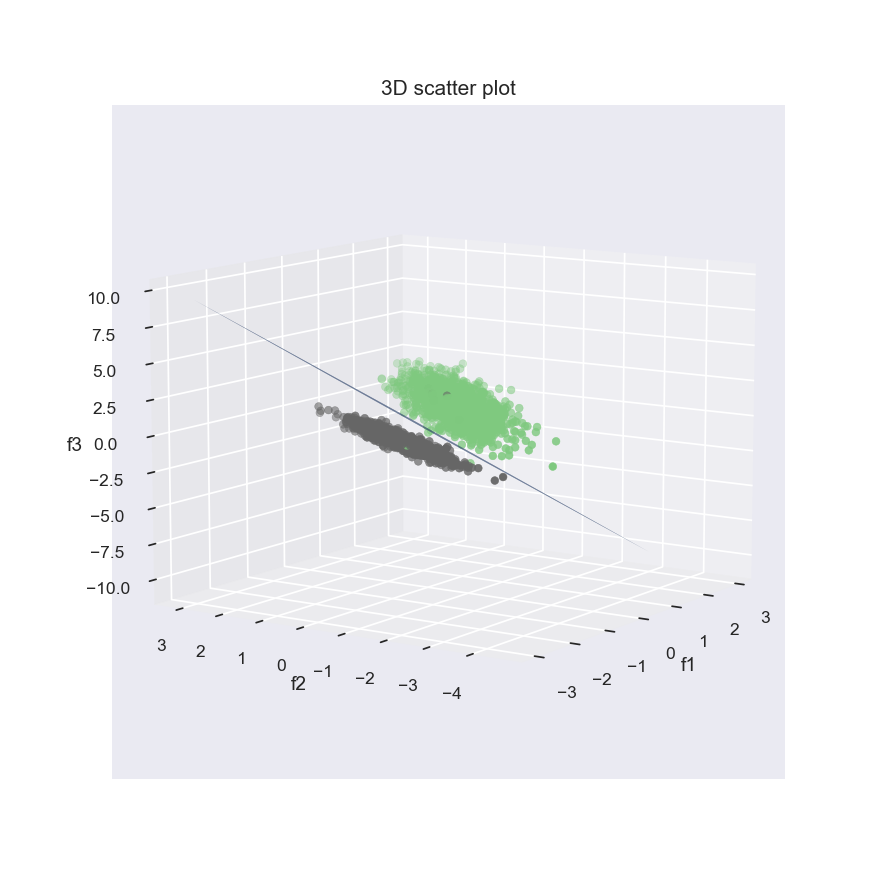

In [46]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection='3d')

# Creating Plot
ax.scatter3D(X_[:, 0], X_[:, 1], X_[:, 2], c=y.reshape((-1,)), cmap=plt.cm.Accent)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
surf = ax.plot_surface(point_X, point_Y, point_Z)
plt.title('3D scatter plot')
plt.show()

In [48]:
theta

array([[-1.40798934],
       [-5.82457416],
       [ 3.63563228],
       [-2.89113187]])

In [49]:
dfXTest = pd.read_csv('../Datasets/Logistic_Regression/Test Cases/Logistic_X_Test.csv')
dfXTest.shape

(1000, 3)

In [50]:
X_t = dfXTest.values

In [51]:
X_t.shape

(1000, 3)

In [52]:
X_t

array([[-0.76750773, -0.2618595 , -2.51483147],
       [-1.24165258,  1.44900144, -0.4130893 ],
       [ 1.92527007,  1.93176097,  1.34261917],
       ...,
       [-1.18696873,  0.94734729, -0.78638597],
       [-0.53232395,  1.84516978, -0.9935503 ],
       [ 0.54023217,  0.58099406,  0.38664901]])

In [54]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)

print(x_mean,x_std)

[0.00745338 0.99928635 0.02948714] [1.33391527 1.02368243 1.20935638]


In [55]:
X_t_ = (X_t - x_mean) / x_std

In [56]:
X_t_.shape

(1000, 3)

<IPython.core.display.Javascript object>


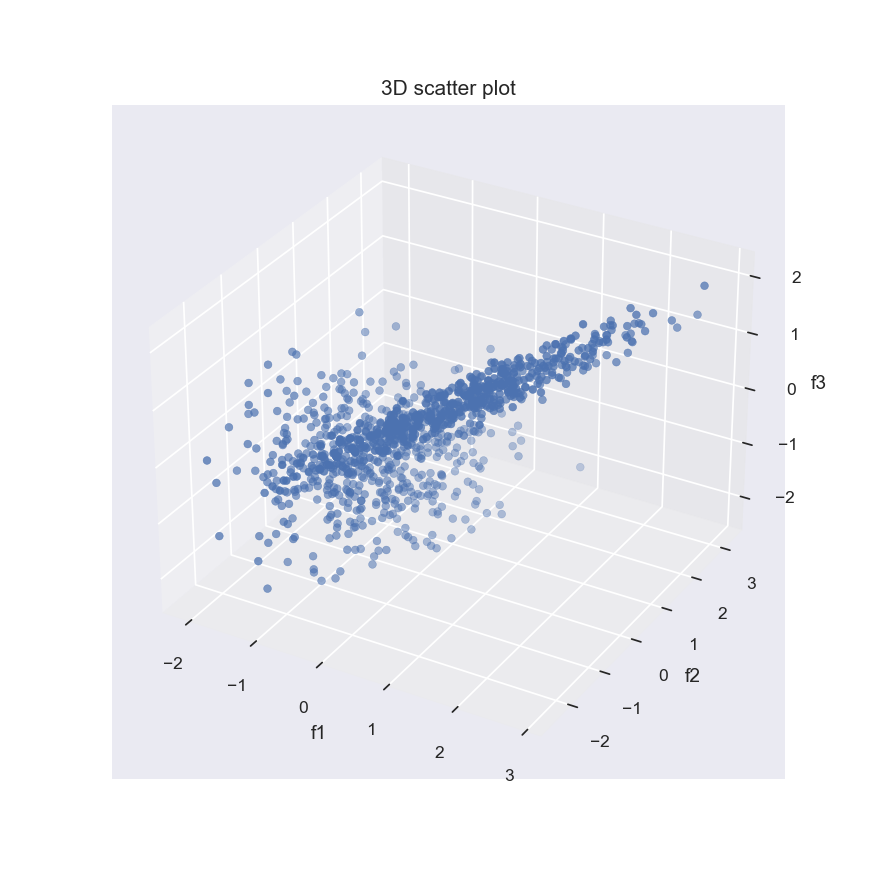

In [57]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection='3d')

# Creating Plot
ax.scatter3D(X_t_[:, 0], X_t_[:, 1], X_t_[:, 2], cmap=plt.cm.Accent)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.title('3D scatter plot')
plt.show()

In [58]:
X_test = np.hstack((np.ones((X_t_.shape[0], 1)), X_t_))
print(X_test.shape)
print(X_test)

(1000, 4)
[[ 1.         -0.58096727 -1.23196981 -2.10386172]
 [ 1.         -0.93642077  0.43931113 -0.36596031]
 [ 1.          1.43773502  0.91090225  1.08581064]
 ...
 [ 1.         -0.89542577 -0.05073748 -0.67463414]
 [ 1.         -0.40465638  0.8263143  -0.84593545]
 [ 1.          0.39940977 -0.40861529  0.29533219]]


In [59]:
def predict(X, theta):
    m = X.shape[0]
    hy = hypothesis(X, theta)
    output = np.zeros((m, 1))
    output[hy >= 0.5] = 1
    output = output.astype('int')
    return hy, output

In [60]:
hy, preds = predict(X_test, theta)

In [62]:
df_hy = pd.DataFrame(hy)
print(df_hy.shape)

(1000, 1)


In [64]:
df_hy.head(1000)

,0
0,0.972866
1,0.998772
2,0.000067
3,0.996993
4,0.996035
...,...
995,0.000005
996,0.000007
997,0.996217
998,0.998339


In [66]:
preds.shape

(1000, 1)

In [65]:
predictions = preds.reshape((-1, ))

In [67]:
predictions

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

<IPython.core.display.Javascript object>


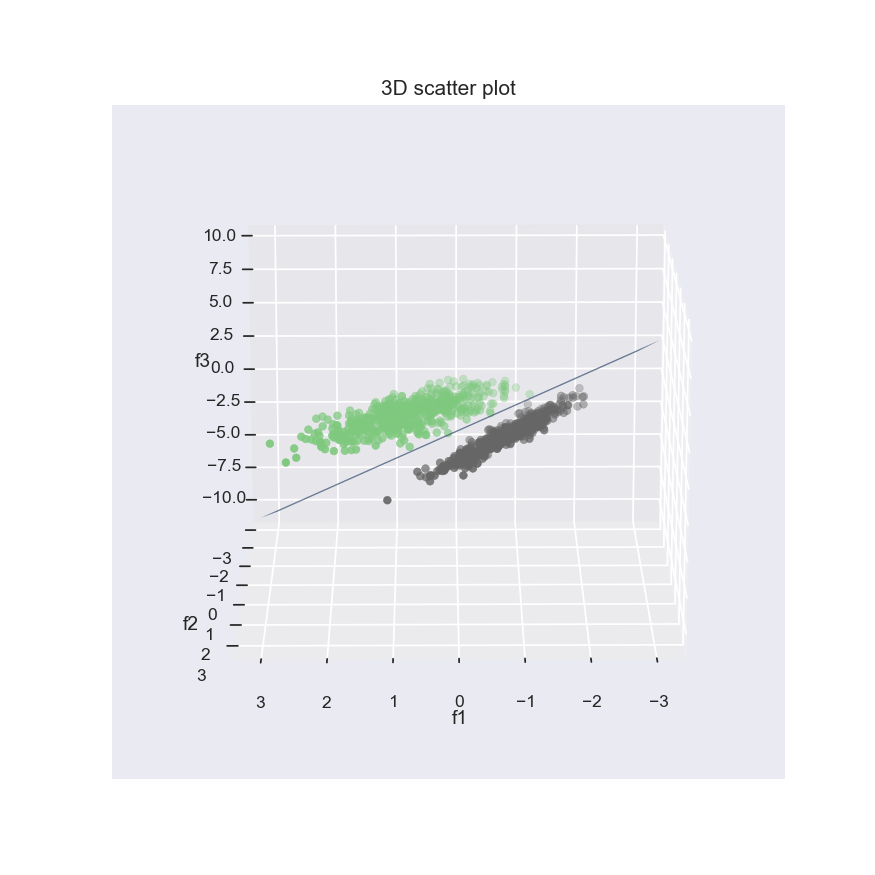

In [68]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection='3d')

point_x = np.linspace(-3, 3, 10)
point_y = np.linspace(-3, 3, 10)

point_X, point_Y = np.meshgrid(point_x, point_y)
point_Z = (-1.0 * (theta[0] + theta[1] * point_X + theta[2] * point_Y)) / theta[3]

# Creating Plot
ax.scatter3D(X_t_[:, 0], X_t_[:, 1], X_t_[:, 2], c=predictions, cmap=plt.cm.Accent)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
surf = ax.plot_surface(point_X, point_Y, point_Z)
plt.title('3D scatter plot')
plt.show()

In [69]:
dfPreds = pd.DataFrame(predictions, columns=['label'])

In [70]:
dfPreds.shape

(1000, 1)

In [71]:
dfPreds.head()

,label
0,1
1,1
2,0
3,1
4,1


In [73]:
dfPreds.to_csv('sol_1.csv', index=False)    # 99% accuracy